# Simple Linear Regression

- In statistics, **simple linear regression** is a linear regression model with a single explanatory variable. That is, it concerns two-dimensional sample points with **one independent variable** and **one dependent variable** (conventionally, the x and y coordinates in a Cartesian coordinate system) and finds **a linear function** (a non-vertical straight line) that, as accurately as possible, predicts the dependent variable values as a function of the independent variable. The adjective simple refers to the fact that the outcome variable is related to a single predictor.
- (from wikipedia)


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('data/Salary_Data.csv')

In [7]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [3]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<AxesSubplot:>

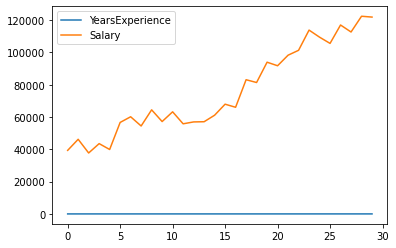

In [4]:
dataset.plot()

In [5]:
X_input = dataset['YearsExperience'] # <-- factor (single)
y_input = dataset['Salary'] # <-- output (prediction result)

In [6]:
X_input.values.shape # [30] --> [30,1]

(30,)

### Note

Sklearn linear function expects 
- X : {array-like, sparse matrix} of shape (n_samples, n_features)
- y : array-like of shape (n_samples,) or (n_samples, n_targets)

Therefore, we need to conevert pandas data format.

In [8]:
print(X_input.values)
print("Shape : ", X_input.values.shape)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
Shape :  (30,)


In [9]:
X = np.expand_dims(X_input.values, axis=1)
y = np.expand_dims(y_input.values, axis=1)
print("Shape of X : ", X.shape)
print("Shape of y : ", y.shape)

Shape of X :  (30, 1)
Shape of y :  (30, 1)


## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
# 20(train dataset), 10(test dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [11]:
y_test.shape

(10, 1)

## Training the Simple Linear Regression model on the Training set

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [13]:
X_test.shape

(10, 1)

In [14]:
y_pred = regressor.predict(X_test)

In [15]:
y_pred

array([[ 40835.10590871],
       [123079.39940819],
       [ 65134.55626083],
       [ 63265.36777221],
       [115602.64545369],
       [108125.8914992 ],
       [116537.23969801],
       [ 64199.96201652],
       [ 76349.68719258],
       [100649.1375447 ]])

## Visualising the *Training* set results

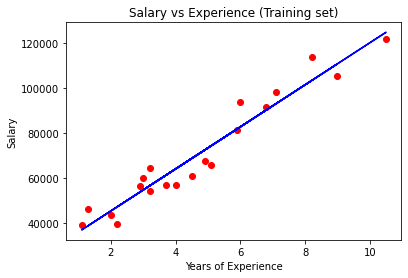

In [16]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the *Test* set results

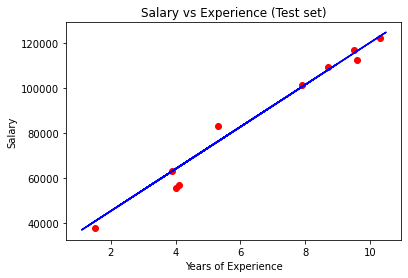

In [17]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()